Baixar Bibliotecas Necessárias 

In [ ]:
%pip install tensorflow numpy matplotlib scikit-learn

Importações

In [2]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix

tf.random.set_seed(42)
np.random.seed(42)

Preparação dos Arquivos do Database

In [ ]:
caminho_origem = './PetImages'  
caminho_destino = './dataset_final' 

# Remove a pasta de destino se ela já existir
if os.path.exists(caminho_destino):
    shutil.rmtree(caminho_destino)

# Cria a estrutura de pastas
for folder in ['treino', 'teste']:
    for class_name in ['cats', 'dogs']:
        os.makedirs(f'{caminho_destino}/{folder}/{class_name}', exist_ok=True)

def separar_arquivos(origem, destino_treino, destino_teste, split_size=0.8):

    arquivos_validos = []
    
    for nome_arquivo in os.listdir(origem):
        caminho_completo = os.path.join(origem, nome_arquivo)
        if os.path.getsize(caminho_completo) > 0:
            arquivos_validos.append(nome_arquivo)
        else:
            print(f"Ignorado (corrompido): {nome_arquivo}")
    
    # Embaralhamento para garantir que o treino e teste sejam aleatórios
    random.shuffle(arquivos_validos)
    
    # Definição do ponto de corte
    ponto_corte = int(len(arquivos_validos) * split_size)
    
    for arquivo in arquivos_validos[:ponto_corte]:
        shutil.copyfile(os.path.join(origem, arquivo), os.path.join(destino_treino, arquivo))
        
    for arquivo in arquivos_validos[ponto_corte:]:
        shutil.copyfile(os.path.join(origem, arquivo), os.path.join(destino_teste, arquivo))

print("Iniciando organização dos arquivos")

# Executa para Gatos
separar_arquivos(f'{caminho_origem}/Cat', 
                 f'{caminho_destino}/treino/cats', 
                 f'{caminho_destino}/teste/cats')

# Executa para Cachorros
separar_arquivos(f'{caminho_origem}/Dog', 
                 f'{caminho_destino}/treino/dogs', 
                 f'{caminho_destino}/teste/dogs')

print("Arquivos organizados e divididos (80/20)!")

Iniciando organização dos arquivos
Ignorado (corrompido): 666.jpg
Ignorado (corrompido): 11702.jpg
Arquivos organizados e divididos (80/20)!


Pré-Processamento

In [ ]:
# Aplicando técnicas de pré-processamento no treino
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalização
    rotation_range=40,      # Rotação
    width_shift_range=0.2,  # Move a imagem horizontalmente
    height_shift_range=0.2, # Move a imagem verticalmente
    zoom_range=0.2,         # Aplica zoom aleatório
    horizontal_flip=True,   # Espelha a imagem
    fill_mode='nearest'     # Preenche pixels vazios criados pela rotação
)

# Normalização nos dados de teste
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    f'{caminho_destino}/treino',
    target_size=(150, 150), # Redimensiona as imagens para 150x150
    batch_size=32,          # Treina com 32 imagens por vez
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    f'{caminho_destino}/teste',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Configurando geradores de imagem...
Found 19999 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


Construção do Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # Camada 1: Conv2D
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    #Camada 2: Flatten
    Flatten(),

    # Camada 3: Dense
    Dense(512, activation='relu'),

    # Camada de Saida
    Dense(1, activation='sigmoid')
])

# Compilação
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Treinamento

Iniciando o treinamento.
Epoch 1/10
602/625 ━━━━━━━━━━━━━━━━━━━━ 16s 703ms/step - accuracy: 0.5675 - loss: 0.7110

c:\Users\Henrique\Documents\Faculdade\IA\Lista Deep Learning\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 489s 782ms/step - accuracy: 0.6024 - loss: 0.6609 - val_accuracy: 0.6693 - val_loss: 0.5890
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.6812 - loss: 0.5887 - val_accuracy: 0.7463 - val_loss: 0.5033
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 289s 463ms/step - accuracy: 0.7112 - loss: 0.5564 - val_accuracy: 0.7588 - val_loss: 0.4996
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 371s 593ms/step - accuracy: 0.7393 - loss: 0.5188 - val_accuracy: 0.7822 - val_loss: 0.4528
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 379s 588ms/step - accuracy: 0.7515 - loss: 0.5057 - val_accuracy: 0.7846 - val_loss: 0.4565
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 366s 586ms/step - accuracy: 0.7605 - loss: 0.4875 - val_accuracy: 0.8026 - val_loss: 0.4232
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 348s 532ms/step - accuracy: 0.7793 - loss: 0.4662 - val_accuracy: 0.8006 - val_loss: 0.4429
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 364s 583ms/step - accuracy: 0.7895 - loss: 0.45

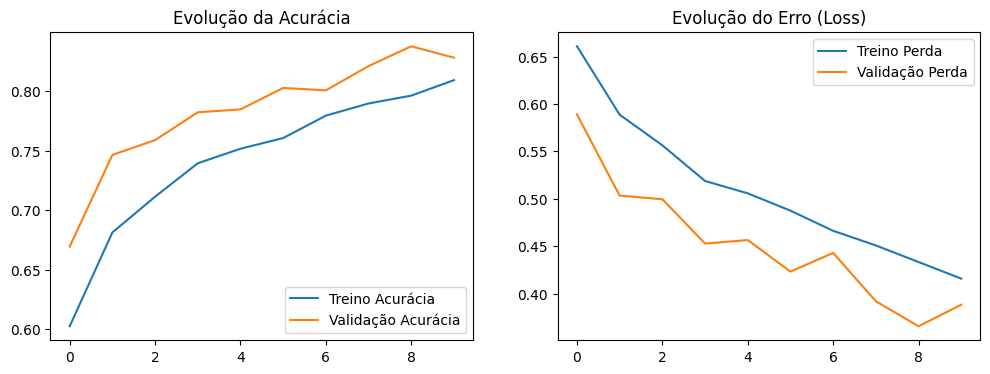

In [7]:
import matplotlib.pyplot as plt

print("Iniciando o treinamento.")

history = model.fit(
    train_generator,
    epochs=10, # Treinamento vai acontecer em 10 épocas
    validation_data=validation_generator,
    verbose=1
)

print("Treinamento finalizado!")

# Plotando os gráficos
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Gráfico 1: Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treino Acurácia')
plt.plot(epochs_range, val_acc, label='Validação Acurácia')
plt.legend(loc='lower right')
plt.title('Evolução da Acurácia')

# Gráfico 2: Perda
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treino Perda')
plt.plot(epochs_range, val_loss, label='Validação Perda')
plt.legend(loc='upper right')
plt.title('Evolução do Erro (Loss)')

plt.show()

Avaliação de Desempanho

In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

previsoes = model.predict(validation_generator)
previsoes_finais = np.where(previsoes > 0.5, 1, 0)

gabarito = validation_generator.classes
nomes = list(validation_generator.class_indices.keys())

print(classification_report(gabarito, previsoes_finais, target_names=nomes))

cm = confusion_matrix(gabarito, previsoes_finais)
print("*" * 100)
print(f"Gatos Reais: {cm[0,0]} acertos | Disse que era cachorro sendo gato: {cm[0,1]} erros.")
print(f"Cachorros Reais: {cm[1,1]} acertos | Disse que era gato sendo cachorro: {cm[1,0]} erros.")

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step
              precision    recall  f1-score   support

        cats       0.85      0.80      0.82      2499
        dogs       0.81      0.86      0.83      2500

    accuracy                           0.83      4999
   macro avg       0.83      0.83      0.83      4999
weighted avg       0.83      0.83      0.83      4999

****************************************************************************************************
Gatos Reais: 1991 acertos | Disse que era cachorro sendo gato: 508 erros.
Cachorros Reais: 2148 acertos | Disse que era gato sendo cachorro: 352 erros.


Teste com base de dados nova

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

caminho_base_extra = './Teste'

extra_datagen = ImageDataGenerator(rescale=1./255)

try:    
    extra_generator = extra_datagen.flow_from_directory(
        caminho_base_extra,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle=False
    )

    resultados = model.evaluate(extra_generator)
    
    print(f"\nResultado dos Testes:")
    print(f"Taxa de Acerto: {resultados[1]*100:.2f}%")
    print(f"Perda (Erro): {resultados[0]:.4f}")

except Exception as e:
    print(f"Erro: {e}")

Found 275 images belonging to 2 classes.
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7745 - loss: 0.5121

Resultado dos Testes:
Taxa de Acerto: 77.45%
Perda (Erro): 0.5121
